# Hierarchical Clustering 

### Problem Statements:
The average retention rate in the insurance industry is 84%, with the top-performing agencies in the 93% - 95% range. Retaining customers is all about the long-term relationship you build. Offering a discount on the client’s current policy will ensure he/she buys a new product or renews the current policy. Studying clients' purchasing behavior to determine which products they're most likely to buy is essential. 

The insurance company wants to analyze their customer’s behavior to strategies offers to increase customer loyalty.


Objective: Maximize the Sales 

Constraints: Minimize the Customer Retention

Success Criteria: 


Business Success Criteria: Increase the Sales by 10% to 12% by targeting cross-selling opportunities on current customers.

ML Success Criteria: Achieve a Silhouette coefficient of at least 0.6

Economic Success Criteria: The insurance company will see an increase in revenues by at least 8% 


### Importing Required Package 

In [2]:
import pandas as pd                                        # For Data Manipulation and Analysis 
import numpy as np                                         # For Numeric Operation 
import matplotlib.pyplot as plt                            # For Data Visulization 
import seaborn as sns                                      # For data Visulization 
from sklearn.preprocessing import StandardScaler           # For standardizing 
from sklearn.pipeline import make_pipeline                 # For creating pip line 
from AutoClean import AutoClean                            # For Auto Clean
from scipy.cluster.hierarchy import linkage, dendrogram    # For Linkage and to plot Dendrogram
from sklearn.cluster import AgglomerativeClustering        # For Clustering 
from sklearn import metrics                                # For Model Evaluation 
from clusteval import clusteval                            # For silhouette score Evaluation
import sweetviz                                            # Auto EDA 
from sqlalchemy import create_engine                       # SQL Connector 

#### Suppress the Warnings

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Importing Dataset 
df = pd.read_csv("AutoInsurance.csv")
df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,10/2/2011,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,12/2/2011,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,6/2/2011,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,3/2/2011,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [5]:
# To get number columns and numbers of row 
df.shape

(9134, 24)

There are total 9134 rows and 24 columns present in dataset 

In [6]:
# Getting Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [7]:
# Getting Descriptive statistical information 
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [8]:
# Checking types of data present in Dataset
df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

#### Expolratory Data analysis (EDA) / Descriptive Statistics

1st Moment Business Decision (Measures of Central Tendency)

1.Mean

2.Median

3.Mode

In [9]:
# Finding avg of features 
df.mean()

Customer Lifetime Value           8004.940475
Income                           37657.380009
Monthly Premium Auto                93.219291
Months Since Last Claim             15.097000
Months Since Policy Inception       48.064594
Number of Open Complaints            0.384388
Number of Policies                   2.966170
Total Claim Amount                 434.088794
dtype: float64

In [10]:
# Finding the middle value in a dataset 
df.median()

Customer Lifetime Value           5780.182197
Income                           33889.500000
Monthly Premium Auto                83.000000
Months Since Last Claim             14.000000
Months Since Policy Inception       48.000000
Number of Open Complaints            0.000000
Number of Policies                   2.000000
Total Claim Amount                 383.945434
dtype: float64

In [11]:
# Finding the most repeated value in dataset 
df.mode()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,AA10041,California,2004.350666,No,Basic,Bachelor,10/1/2011,Employed,F,0.0,...,59.0,0.0,1.0,Personal Auto,Personal L3,Offer1,Agent,316.8,Four-Door Car,Medsize
1,AA11235,NaN,2227.072755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AA16582,NaN,2248.449633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AA30683,NaN,2300.691547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AA34092,NaN,2359.423599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,ZZ77357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9130,ZZ83340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9131,ZZ89380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9132,ZZ91716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2nd Moment Business Decision (Measures of Dispersion)

1.Variance

2.Standard deviation

In [12]:
# Finding Variance (degree of spread)
df.var()

Customer Lifetime Value          4.721020e+07
Income                           9.229386e+08
Monthly Premium Auto             1.183908e+03
Months Since Last Claim          1.014705e+02
Months Since Policy Inception    7.787443e+02
Number of Open Complaints        8.287982e-01
Number of Policies               5.712969e+00
Total Claim Amount               8.439030e+04
dtype: float64

Column "Income" has high variance of 9.22

In [13]:
# Finding Standard Deviation 
df.std()

Customer Lifetime Value           6870.967608
Income                           30379.904734
Monthly Premium Auto                34.407967
Months Since Last Claim             10.073257
Months Since Policy Inception       27.905991
Number of Open Complaints            0.910384
Number of Policies                   2.390182
Total Claim Amount                 290.500092
dtype: float64

3rd Business Moment Decision (Skewness)

Measure of asymmetry in the data distribution

In [14]:
# Finding Skewness (behavior of a distribution)(shape and distribution of data)
df.skew()

Customer Lifetime Value          3.032280
Income                           0.286887
Monthly Premium Auto             2.123546
Months Since Last Claim          0.278586
Months Since Policy Inception    0.040165
Number of Open Complaints        2.783263
Number of Policies               1.253333
Total Claim Amount               1.714966
dtype: float64

Column "Income", "Months Since Last Claim" and "Months Since Policy Inception" has "Symmetric distribution"

As we notice all data has positive skewness, that means Mean > Median > Mode

4th Business Moment Decision (Kurtosis)

Measure of peakedness - represents the overall spread in the data

In [15]:
# Finding overall spread in the data
df.kurt()

Customer Lifetime Value          13.823533
Income                           -1.094326
Monthly Premium Auto              6.193605
Months Since Last Claim          -1.073668
Months Since Policy Inception    -1.133046
Number of Open Complaints         7.749308
Number of Policies                0.363157
Total Claim Amount                5.979401
dtype: float64

#### Handling Dupliate Value 

In [16]:
duplicate = df.duplicated()
duplicate.sum()

0

There are No Duplicates Values 

#### Handling Null Values 

In [17]:
df.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

There is NO Null Values in dataset

#### Handling Outliers 

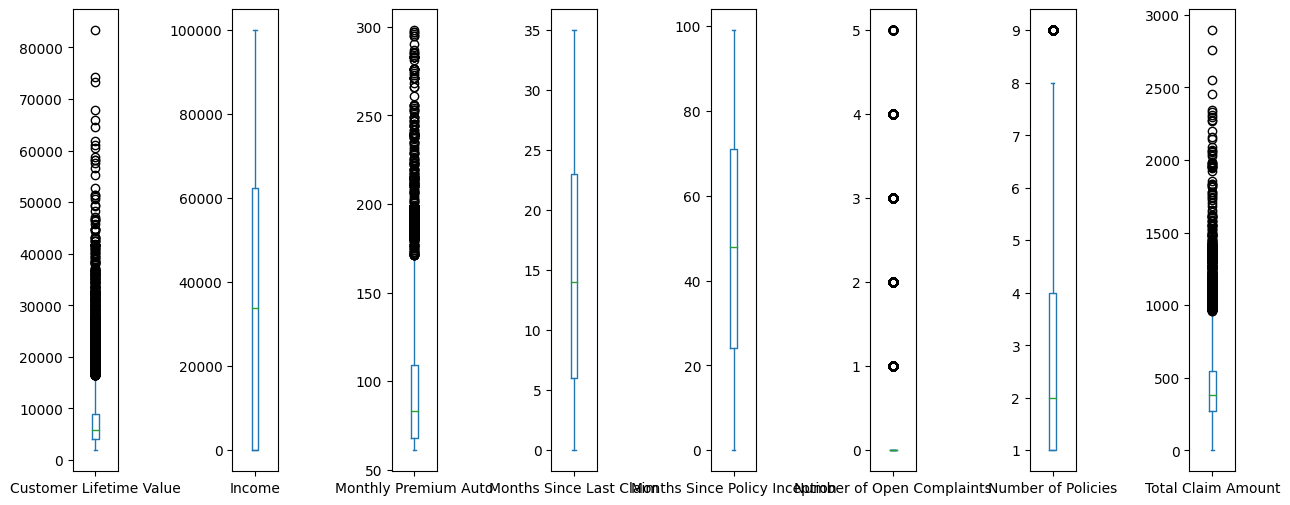

In [18]:
df.plot(kind='box',subplots= True, sharey = False,figsize = (15,6))
plt.subplots_adjust(wspace = 2.5) # ws is the width of the padding between subplots, as a fraction of the average Axes width.
#plt.xticks(rotation=45)
plt.show()

There are Outliers in "Customer Life time value", "MOnthly Premium Auto", Number of Open Complaints" and "Total claim AMount"

In [19]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

Selecting Requried Columns and Neglecting Unwanted columns

In [20]:
columns_to_select = ['Customer Lifetime Value', 'Response', 'Coverage', 'EmploymentStatus', 'Income','Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
     'Number of Policies', 'Policy Type',
       'Policy']
selected_columns = df[columns_to_select]

In [21]:
selected_columns.dtypes

Customer Lifetime Value          float64
Response                          object
Coverage                          object
EmploymentStatus                  object
Income                             int64
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
dtype: object

Creating Pipeline using "AutoClean" with parameter (index location from 1, with Manual Mode, Outliers treatment with Winzer, and Encoding method was auto) 

In [22]:
# Auto Preprocessing and Cleaning
# from AutoClean import AutoClean
clean_pipeline = AutoClean(selected_columns.iloc[:, 1:], mode = 'manual',
                           outliers = 'winz', encode_categ = 'auto')

AutoClean process completed in 1.081173 seconds
Logfile saved to: C:\Users\abhic\Desktop\ML\Clustering\Hierarchical Clustering\Assigment\autoclean.log


In [23]:
# Getting Cleaned Data 
Clean_data = clean_pipeline.output
Clean_data.head(5)

,Response,Coverage,EmploymentStatus,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Policies,Policy Type,Policy,...,Coverage_Premium,Policy_Corporate L1,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3
0,No,Basic,Employed,56274,69,32,5,1,Corporate Auto,Corporate L3,...,0,0,0,1,0,0,0,0,0,0
1,No,Extended,Unemployed,0,94,13,42,8,Personal Auto,Personal L3,...,0,0,0,0,0,0,1,0,0,0
2,No,Premium,Employed,48767,108,18,38,2,Personal Auto,Personal L3,...,1,0,0,0,0,0,1,0,0,0
3,No,Basic,Unemployed,0,106,18,65,7,Corporate Auto,Corporate L2,...,0,0,1,0,0,0,0,0,0,0
4,No,Basic,Employed,43836,73,12,44,1,Personal Auto,Personal L1,...,0,0,0,0,1,0,0,0,0,0


In [24]:
# Checking Data Types for Numeric Selection 
Clean_data.dtypes

Response                          object
Coverage                          object
EmploymentStatus                  object
Income                             Int64
Monthly Premium Auto               Int64
Months Since Last Claim            Int64
Months Since Policy Inception      Int64
Number of Policies                 Int64
Policy Type                       object
Policy                            object
Policy Type_Corporate Auto         Int64
Policy Type_Personal Auto          Int64
Policy Type_Special Auto           Int64
EmploymentStatus_Disabled          Int64
EmploymentStatus_Employed          Int64
EmploymentStatus_Medical Leave     Int64
EmploymentStatus_Retired           Int64
EmploymentStatus_Unemployed        Int64
Response_No                        Int64
Response_Yes                       Int64
Coverage_Basic                     Int64
Coverage_Extended                  Int64
Coverage_Premium                   Int64
Policy_Corporate L1                Int64
Policy_Corporate

In [25]:
# Selecting only Numeric features 
Numeric_Features = Clean_data.select_dtypes(exclude = ['object']).columns
Numeric_Features

Index(['Income', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Policies',
       'Policy Type_Corporate Auto', 'Policy Type_Personal Auto',
       'Policy Type_Special Auto', 'EmploymentStatus_Disabled',
       'EmploymentStatus_Employed', 'EmploymentStatus_Medical Leave',
       'EmploymentStatus_Retired', 'EmploymentStatus_Unemployed',
       'Response_No', 'Response_Yes', 'Coverage_Basic', 'Coverage_Extended',
       'Coverage_Premium', 'Policy_Corporate L1', 'Policy_Corporate L2',
       'Policy_Corporate L3', 'Policy_Personal L1', 'Policy_Personal L2',
       'Policy_Personal L3', 'Policy_Special L1', 'Policy_Special L2',
       'Policy_Special L3'],
      dtype='object')

In [26]:
# from sklearn.preprocessing import StandardScaler
# To standard the data we use Standard Scaler 
Std_pipeline = make_pipeline(StandardScaler())

In [27]:
# Selecting Only columns 
cols = list(Clean_data[Numeric_Features].columns)
print(cols)

['Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Policies', 'Policy Type_Corporate Auto', 'Policy Type_Personal Auto', 'Policy Type_Special Auto', 'EmploymentStatus_Disabled', 'EmploymentStatus_Employed', 'EmploymentStatus_Medical Leave', 'EmploymentStatus_Retired', 'EmploymentStatus_Unemployed', 'Response_No', 'Response_Yes', 'Coverage_Basic', 'Coverage_Extended', 'Coverage_Premium', 'Policy_Corporate L1', 'Policy_Corporate L2', 'Policy_Corporate L3', 'Policy_Personal L1', 'Policy_Personal L2', 'Policy_Personal L3', 'Policy_Special L1', 'Policy_Special L2', 'Policy_Special L3']


In [29]:
# Fit and Tranforming Clean Data into pipe1 and creating dataframe with columns 
Standard_data = pd.DataFrame(Std_pipeline.fit_transform                    # Fit and Transforming Numeric data
                             (Clean_data[Numeric_Features]),               # Numeric data
                             columns = cols,                               # Defining columns 
                             index = Clean_data[Numeric_Features].index)   # Assigning Index
Standard_data.head()                                                   # Top 5 Rows 

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Policies,Policy Type_Corporate Auto,Policy Type_Personal Auto,Policy Type_Special Auto,EmploymentStatus_Disabled,EmploymentStatus_Employed,...,Coverage_Premium,Policy_Corporate L1,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3
0,0.612827,-0.792648,1.678099,-1.543287,-0.841748,1.908209,-1.701010,-0.207775,-0.2154,0.776543,...,-0.314893,-0.202266,-0.263970,2.829821,-0.396335,-0.550113,-0.774732,-0.085313,-0.135215,-0.128336
1,-1.239617,0.089205,-0.208186,-0.217334,2.226125,-0.524052,0.587886,-0.207775,-0.2154,-1.287759,...,-0.314893,-0.202266,-0.263970,-0.353379,-0.396335,-0.550113,1.290768,-0.085313,-0.135215,-0.128336
2,0.365710,0.583043,0.288205,-0.360680,-0.403481,-0.524052,0.587886,-0.207775,-0.2154,0.776543,...,3.175681,-0.202266,-0.263970,-0.353379,-0.396335,-0.550113,1.290768,-0.085313,-0.135215,-0.128336
3,-1.239617,0.512494,0.288205,0.606907,1.787858,1.908209,-1.701010,-0.207775,-0.2154,-1.287759,...,-0.314893,-0.202266,3.788306,-0.353379,-0.396335,-0.550113,-0.774732,-0.085313,-0.135215,-0.128336
4,0.203390,-0.651552,-0.307465,-0.145661,-0.841748,-0.524052,0.587886,-0.207775,-0.2154,0.776543,...,-0.314893,-0.202266,-0.263970,-0.353379,2.523119,-0.550113,-0.774732,-0.085313,-0.135215,-0.128336


#### CLUSTERING MODEL BUILDING

Hierarchical Clustering - Agglomerative Clustering

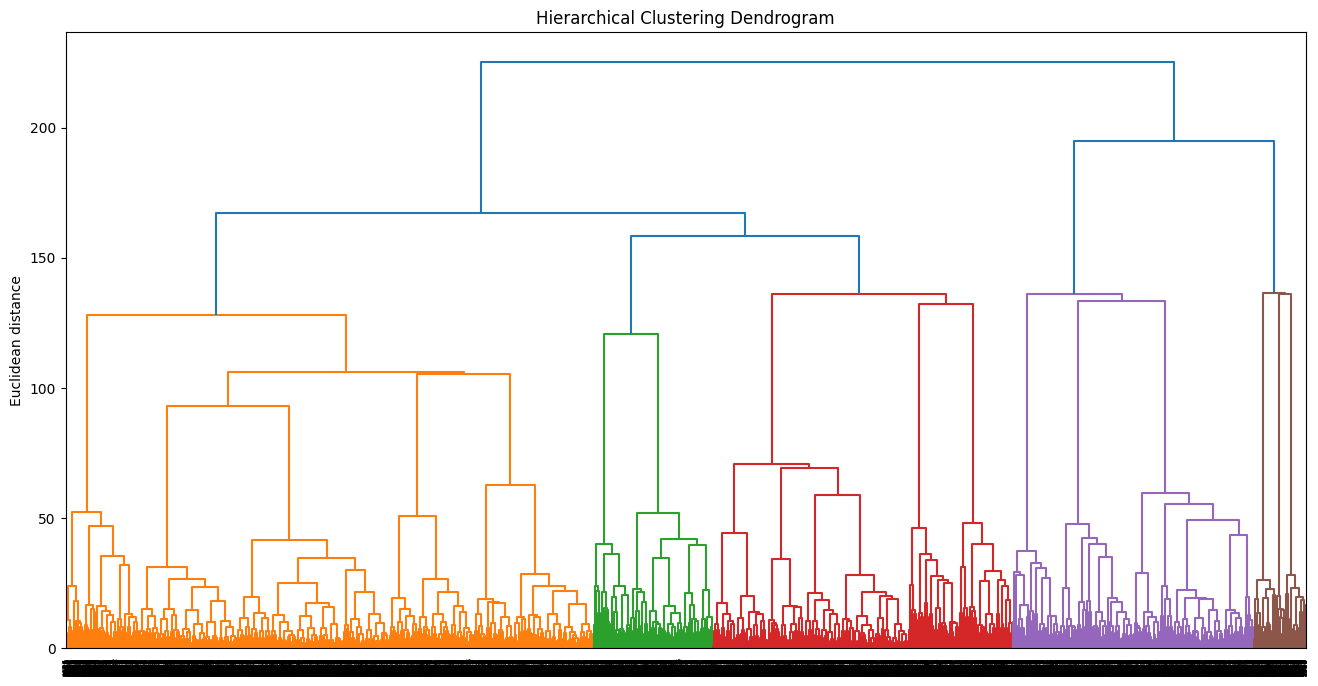

In [30]:
# Creating Dendrogram to check how many cluster are formed 
plt.figure(1, figsize = (16, 8))                                    # Creating empty plt 
tree_plot = dendrogram(linkage(Standard_data, method  = "ward",))    # plot dendrogram with Standard_data and  ward linkage method 
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('Euclidean distance')
plt.show()

In [31]:
# Creating and Applying Agglomerative Clustering 
Agglo_cluster = (AgglomerativeClustering      # Agglomerative CLustering
                 (n_clusters = 5,             # Number of Cluster = 5 (Based on Dendrogram)
                  affinity = 'euclidean',     # Using euclidean distance 
                  linkage = 'single'))        # linakge = single 
Agglo_cluster

AgglomerativeClustering(affinity='euclidean', linkage='single', n_clusters=5)

In [32]:
# Fiting and Predicting Standard_data
Agglo_Pred = Agglo_cluster.fit_predict(Standard_data)   # Fiting the Standard data
Agglo_Pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [33]:
# Analyzing the Results obtained
Agglo_cluster.labels_  # Referring to the cluster labels assigned

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [34]:
# Assigning series to Agglo_Cluster_lalbel
cluster_labels = pd.Series(Agglo_cluster.labels_ )    
cluster_labels

0       1
1       1
2       1
3       1
4       1
       ..
9129    1
9130    1
9131    1
9132    1
9133    1
Length: 9134, dtype: int64

In [43]:
# Combine the labels, customer info and clean data 
df_clust = pd.concat([df.Customer,cluster_labels, Clean_data[Numeric_Features]], axis = 1) 
df_clust = df_clust.rename(columns = {0:'cluster_id'})
df_clust.head(5)

,Customer,cluster_id,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Policies,Policy Type_Corporate Auto,Policy Type_Personal Auto,Policy Type_Special Auto,...,Coverage_Premium,Policy_Corporate L1,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3
0,BU79786,1,56274,69,32,5,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,QZ44356,1,0,94,13,42,8,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,AI49188,1,48767,108,18,38,2,0,1,0,...,1,0,0,0,0,0,1,0,0,0
3,WW63253,1,0,106,18,65,7,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,HB64268,1,43836,73,12,44,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [36]:
# from sklearn import metrics
# Fining silhouette_score from metrics 
metrics.silhouette_score(Standard_data, cluster_labels)

0.41044852221798844

silhouette_score is used to define quality of cluster 

In [37]:
# Silhouette cluster evaluation. 
ce = clusteval(evaluate = 'silhouette')

In [38]:
df_array = np.array(Standard_data) # converting standard data into arry formate

In [39]:
# Fit
ce.fit(df_array)

[clusteval] >INFO> Saving data in memory.
[clusteval] >INFO> Fit with method=[agglomerative], metric=[euclidean], linkage=[ward]
[clusteval] >INFO> Evaluate using silhouette.
[clusteval] >INFO: 100%|██████████| 23/23 [01:46<00:00,  4.62s/it]
[clusteval] >INFO> Compute dendrogram threshold.
[clusteval] >INFO> Optimal number clusters detected: [24].
[clusteval] >INFO> Fin.


{'evaluate': 'silhouette',
 'score':     cluster_threshold  clusters     score
 0                   2         2  0.219674
 1                   3         3  0.197720
 2                   4         4  0.133022
 3                   5         5  0.150846
 4                   6         6  0.161522
 5                   7         7  0.169646
 6                   8         8  0.190076
 7                   9         9  0.180959
 8                  10        10  0.203889
 9                  11        11  0.222715
 10                 12        12  0.239851
 11                 13        13  0.253247
 12                 14        14  0.224342
 13                 15        15  0.235124
 14                 16        16  0.232766
 15                 17        17  0.241149
 16                 18        18  0.252380
 17                 19        19  0.261500
 18                 20        20  0.259191
 19                 21        21  0.263155
 20                 22        22  0.267246
 21               

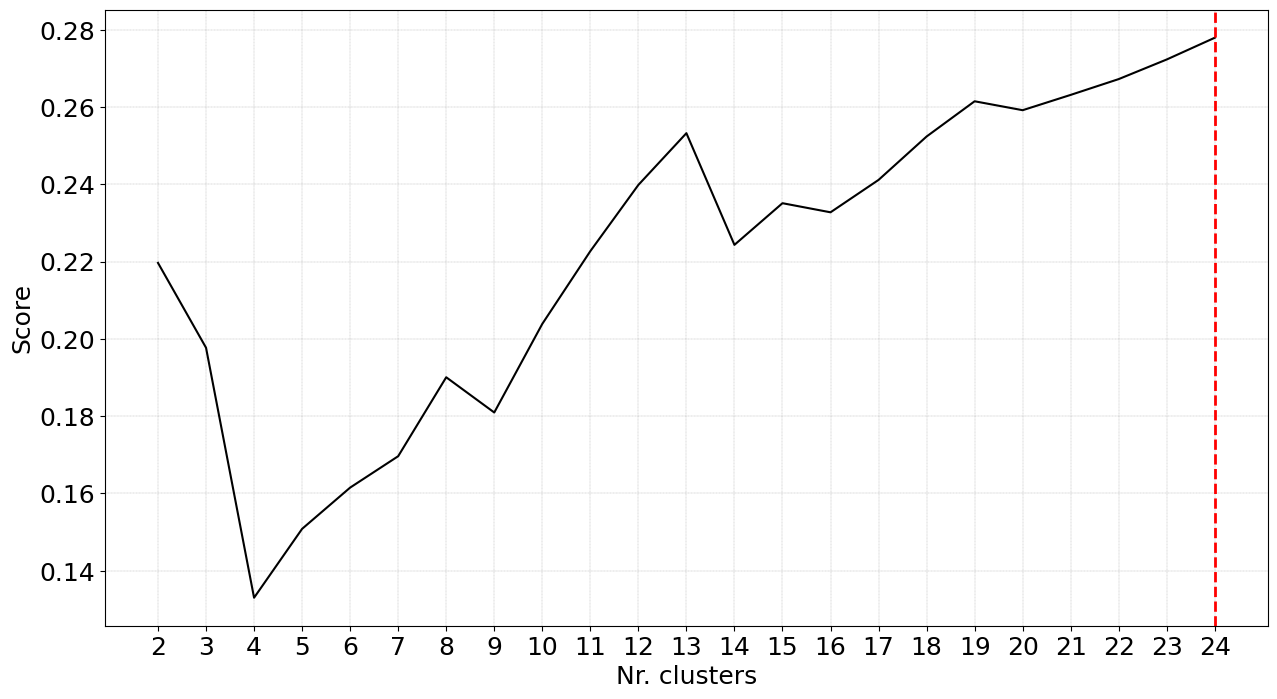

(<Figure size 1500x800 with 1 Axes>,
 <AxesSubplot: xlabel='Nr. clusters', ylabel='Score'>)

In [40]:
# Plot
ce.plot()

From clust evaluation we can see by 24 cluster we get silhouette score about 0.27

In [45]:
# Geting Standard data 
df_clust.to_csv('Cluster_Info_.csv', encoding = 'utf-8')

In [42]:
import os
os.getcwd()     # Checking file path

'C:\\Users\\abhic\\Desktop\\ML\\Clustering\\Hierarchical Clustering\\Assigment'